Data: https://www.kaggle.com/arjunprasadsarkhel/2021-olympics-in-tokyo

original link: https://youtu.be/wwsizzg6UjU



# Practical Statistics for Data Scientists
---

In [15]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import seaborn as sns

In [20]:
medal_count = pd.read_excel('Data-2021-olympics-in-tokyo\Medals.xls')
medal_count

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,39,41,33,113,1
1,2,People's Republic of China,38,32,18,88,2
2,3,Japan,27,14,17,58,5
3,4,Great Britain,22,21,22,65,4
4,5,ROC,20,28,23,71,3
...,...,...,...,...,...,...,...
88,86,Ghana,0,0,1,1,77
89,86,Grenada,0,0,1,1,77
90,86,Kuwait,0,0,1,1,77
91,86,Republic of Moldova,0,0,1,1,77


## Estimates of Location

In [21]:
# Mean
medal_count["Total"].mean()

11.612903225806452

In [22]:
# weighed mean
np.average(medal_count["Total"], weights=medal_count["Gold"])

46.832352941176474

In [24]:
# Trimmed mean
trim_mean(medal_count["Gold"], 0.1)

1.96

In [25]:
# Median
medal_count["Total"].median()

4.0

In [27]:
# Weigthed median

def weighted_median(df, median_col, weight_col):
  df_sorted = df.sort_values(median_col)
  cumsum = df_sorted[weight_col].cumsum()
  cutoff = df_sorted[weight_col].sum() / 2.
  return df_sorted[cumsum >= cutoff][median_col].iloc[0]

weighted_median(medal_count, "Total", "Gold")

40

In [31]:
import wquantiles

# Weigthed median...original method from the book
np.average(medal_count["Gold"], weights=medal_count["Total"])
wquantiles.median(medal_count["Gold"], weights=medal_count["Total"])

10.0

In [32]:
# Percentile
q3 = np.percentile(medal_count["Total"],75)
q3

11.0

In [34]:
# interesting method to get a lot of standard info
medal_count.describe()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,46.333333,3.655914,3.634409,4.322581,11.612903,43.494624
std,26.219116,7.022471,6.626339,6.210372,19.091332,24.171769
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,24.000000,0.000000,0.000000,1.000000,2.000000,23.000000
50%,46.000000,1.000000,1.000000,2.000000,4.000000,47.000000
75%,70.000000,3.000000,4.000000,5.000000,11.000000,66.000000
max,86.000000,39.000000,41.000000,33.000000,113.000000,77.000000


## Estimates of Variability (Dispersion Metrics)

In [35]:
# Variance
from statistics import variance
variance(medal_count["Gold"])

49.315100514259

In [36]:
# Standard deviation
from statistics import stdev
stdev(medal_count["Gold"])

7.022471111671376

In [37]:
# Mean absolute deviation
from numpy import mean, absolute
mean(absolute(medal_count["Gold"] - medal_count["Gold"].mean()))

4.0048560527228565

In [45]:
# Median absolute Deviation
from numpy import median, absolute
median(absolute(medal_count["Gold"] - medal_count["Gold"].median()))


1.0

In [46]:
# Interqueantile Range
q3, q1 = np.percentile(medal_count["Gold"], [75,25])
iqr = q3 - q1
iqr

3.0

## Exploring the Data Distribution

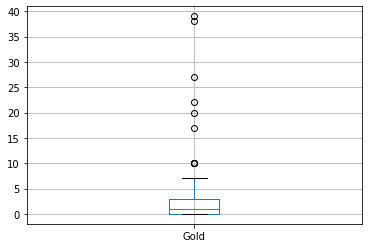

In [47]:
# Boxplot
medal_count.boxplot(column="Gold", by=None, ax=None)

In [48]:
# Frequency table
binnedGolds = pd.cut(medal_count["Gold"],10)
binnedGolds.value_counts()


(-0.039, 3.9]    72
(3.9, 7.8]       11
(7.8, 11.7]       4
(35.1, 39.0]      2
(19.5, 23.4]      2
(23.4, 27.3]      1
(15.6, 19.5]      1
(31.2, 35.1]      0
(27.3, 31.2]      0
(11.7, 15.6]      0
Name: Gold, dtype: int64

Text(0.5, 0, 'Gold medals')

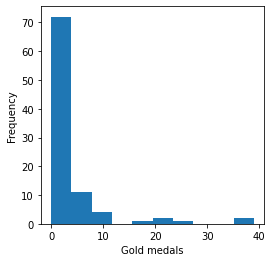

In [49]:
# Histogram
ax = (medal_count["Gold"]).plot.hist(figsize=(4,4))
ax.set_xlabel('Gold medals')


Text(0.5, 0, 'Gold medals')

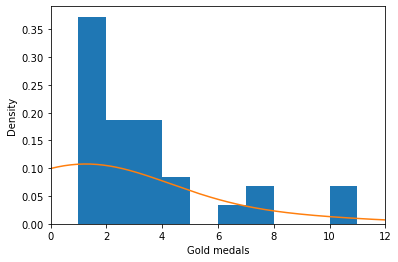

In [50]:
# Density plot
ax = medal_count['Gold'].plot.hist(density=True, xlim=[0,12],bins=range(1,12))
medal_count["Gold"].plot.density(ax=ax)
ax.set_xlabel("Gold medals")

## Exploring Binary and Categorical Data



In [51]:
# Mode
medal_count["Gold"].mode()

0    0
dtype: int64

Text(0, 0.5, 'Country')

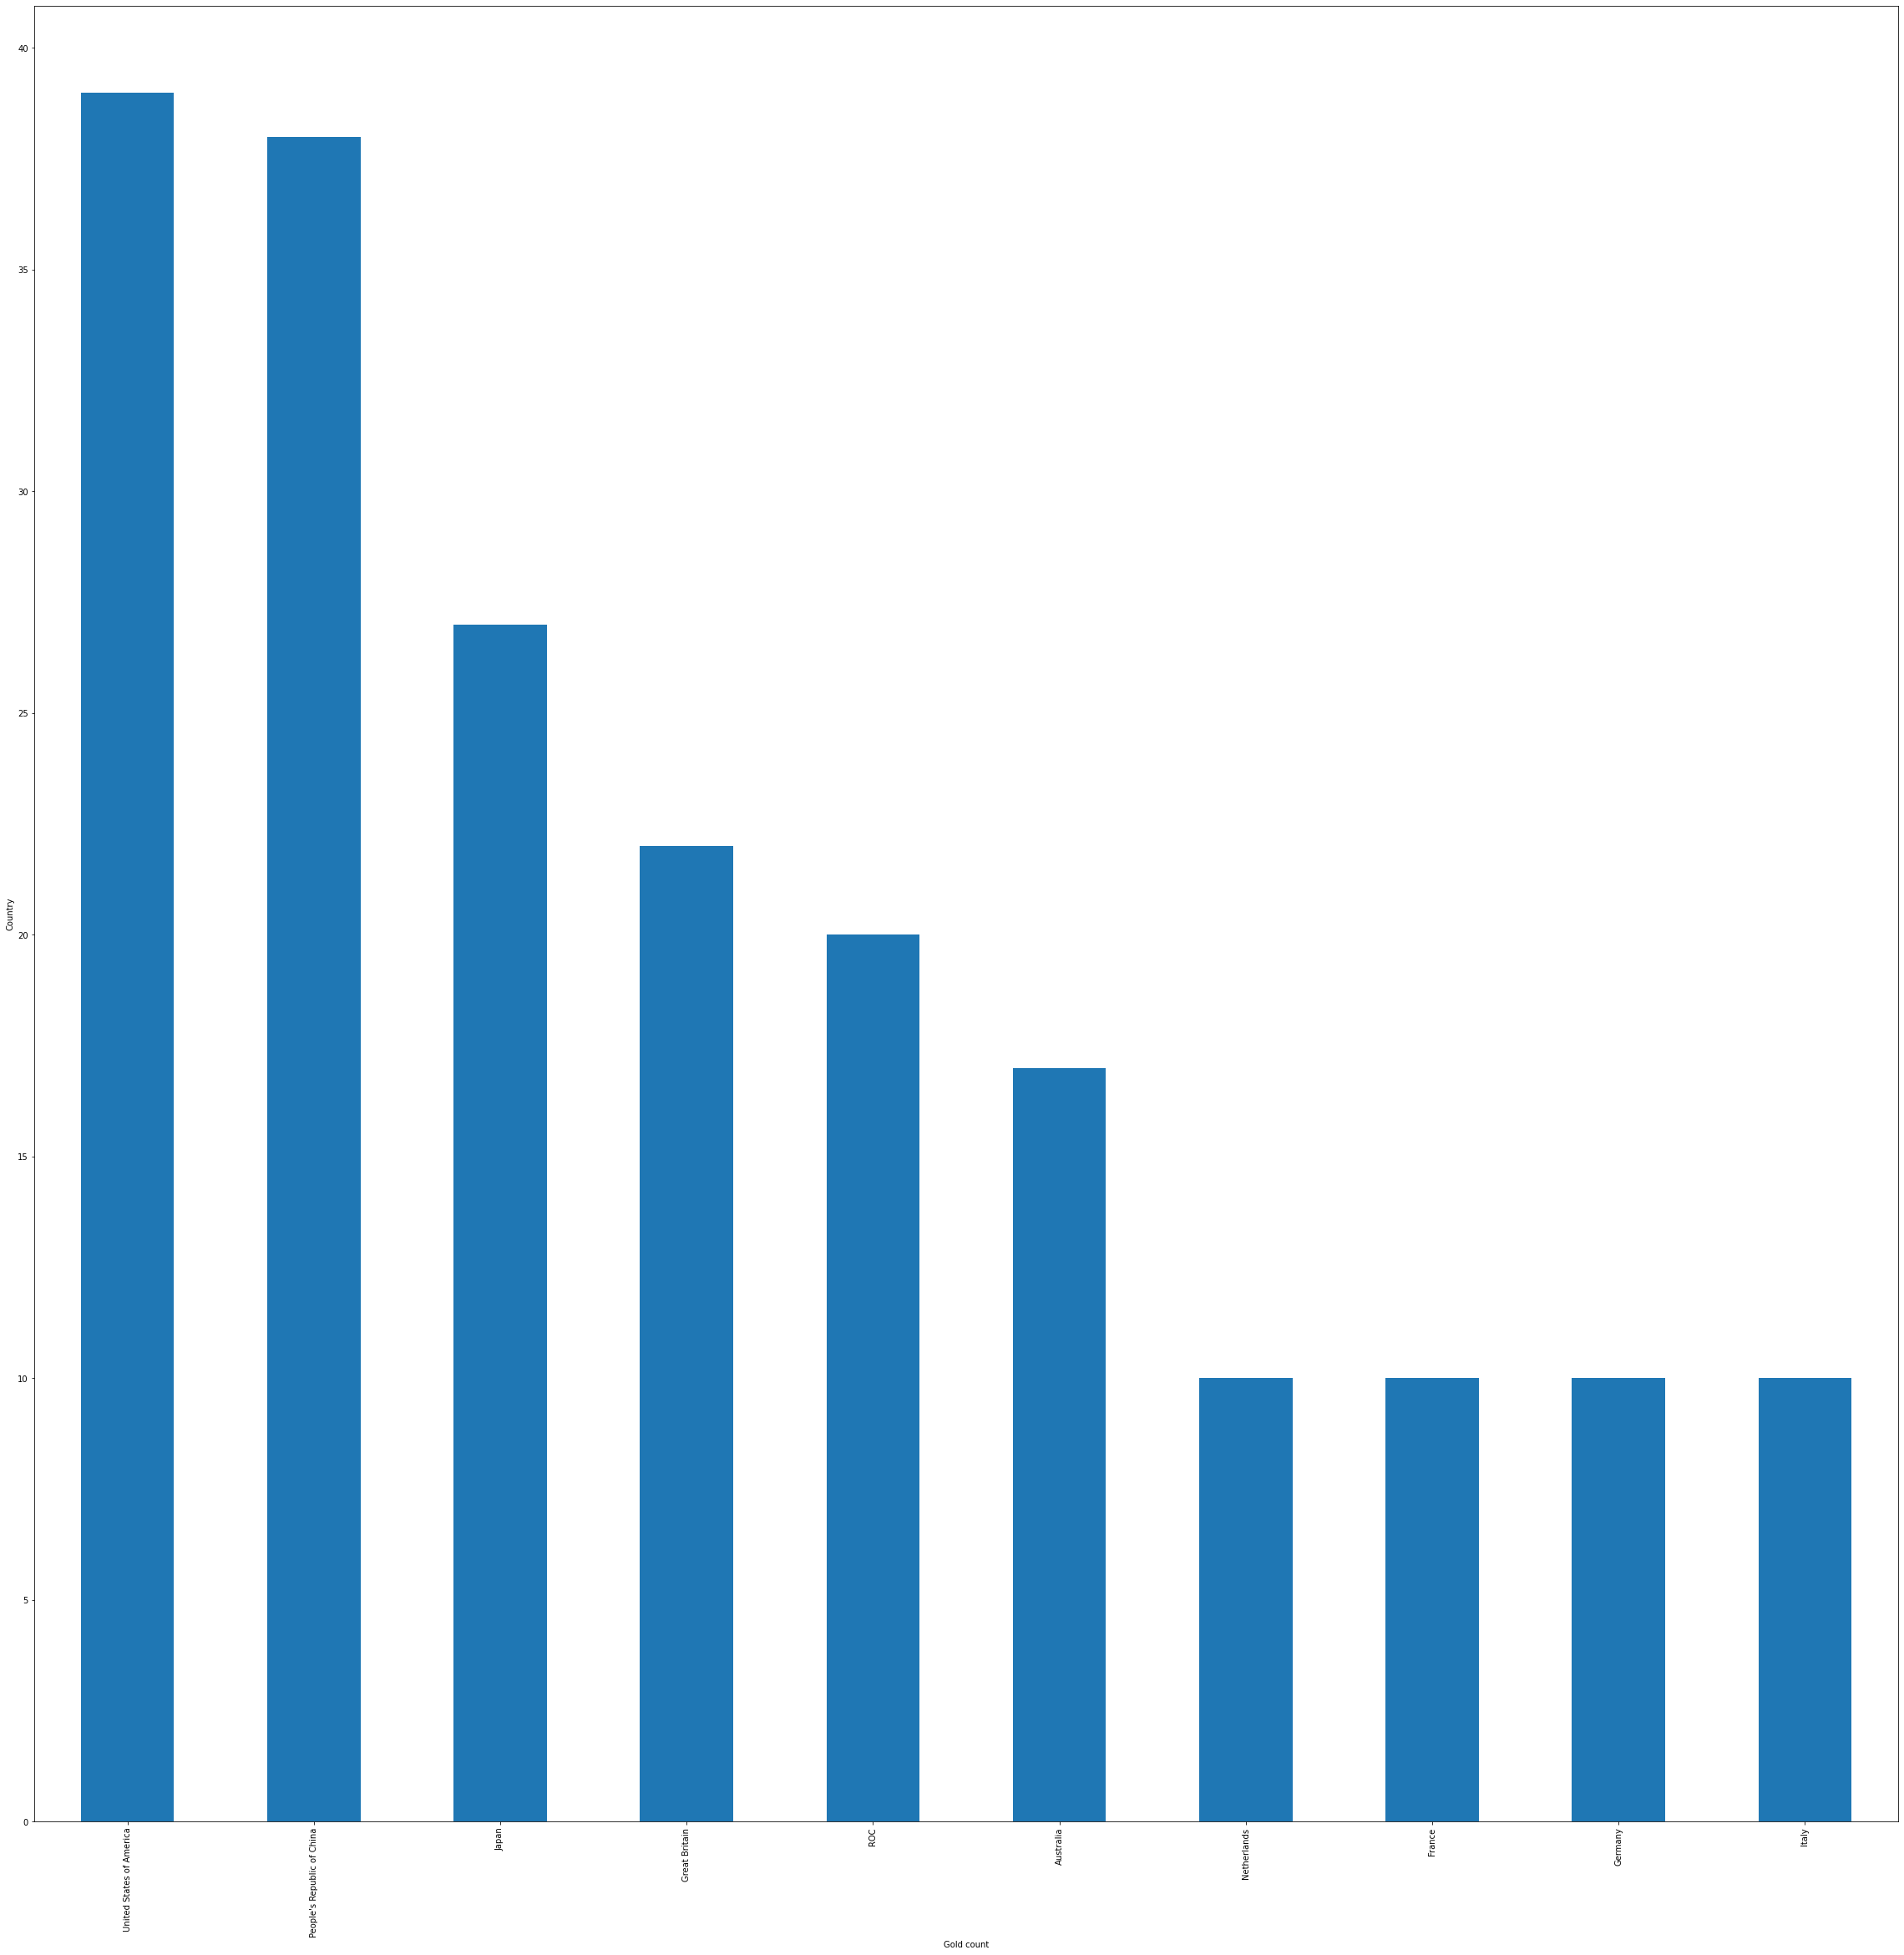

In [61]:
ax = medal_count.iloc[:10,:].plot.bar(x="Team/NOC", y="Gold", figsize=(40,40), legend = False)
ax.set_xlabel('Gold count')
ax.set_ylabel('Country')

([<matplotlib.patches.Wedge at 0x130e5d40748>,
 [Text(-0.7155314051070093, 0.8354728052459811, 'United States of America'),
  Text(-0.9458998161617527, -0.5614922419634689, "People's Republic of China"),
  Text(0.15924203448189886, -1.0884125938512774, 'Japan'),
  Text(0.9458998161617524, -0.5614922419634694, 'Great Britain'),
  Text(1.0717821060885606, 0.247554270955622, 'ROC'),
  Text(0.6847227019531091, 0.8609034913566292, 'Australia'),
  Text(0.19865842661840455, 1.081912579432137, 'Netherlands')],
 [Text(-0.39028985733109595, 0.45571243922508053, '22.5%'),
  Text(-0.5159453542700468, -0.3062684956164376, '22.0%'),
  Text(0.0868592915355812, -0.5936795966461513, '15.6%'),
  Text(0.5159453542700467, -0.30626849561643776, '12.7%'),
  Text(0.5846084215028512, 0.13502960233943015, '11.6%'),
  Text(0.3734851101562413, 0.46958372255816133, '9.8%'),
  Text(0.10835914179185702, 0.590134134235711, '5.8%')])

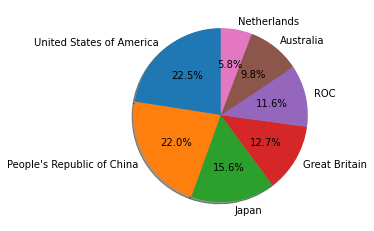

In [67]:
# Pie chart
import matplotlib.pyplot as plt
pie_data = medal_count.iloc[:7,:]
plt.pie(pie_data["Gold"], labels=pie_data["Team/NOC"], autopct='%1.1f%%', shadow=True, startangle=90)

#ax = medal_count.iloc[:10,:].plot.pie(y="Gold") # original method from the book

## Correlation

In [69]:
# Correlation Matrix
medal_count.corr()

,Rank,Gold,Silver,Bronze,Total,Rank by Total
Rank,1.000000,-0.655477,-0.597835,-0.637166,-0.655877,0.873539
Gold,-0.655477,1.000000,0.929046,0.862425,0.970840,-0.626012
Silver,-0.597835,0.929046,1.000000,0.862646,0.969439,-0.632831
Bronze,-0.637166,0.862425,0.862646,1.000000,0.941941,-0.745573
Total,-0.655877,0.970840,0.969439,0.941941,1.000000,-0.692450
Rank by Total,0.873539,-0.626012,-0.632831,-0.745573,-0.692450,1.000000


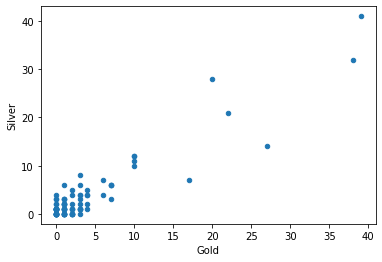

In [70]:
medal_count.plot.scatter(x="Gold", y="Silver")

## Exploring two or more variables

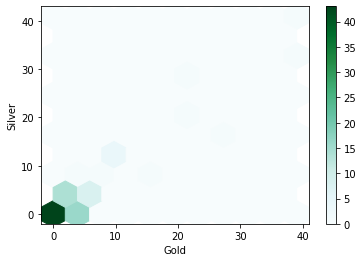

In [76]:
# hexagonal binning using pandas
medal_count.plot.hexbin(x="Gold", y="Silver", gridsize=10, sharex=False)

c:\users\jraldua-veuthey\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


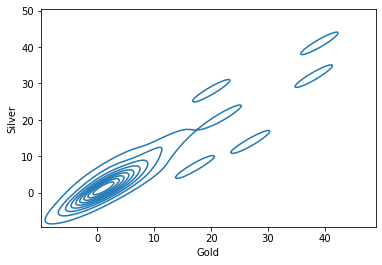

In [79]:
# countour plot
ax = sns.kdeplot(medal_count["Gold"], medal_count["Silver"])
ax

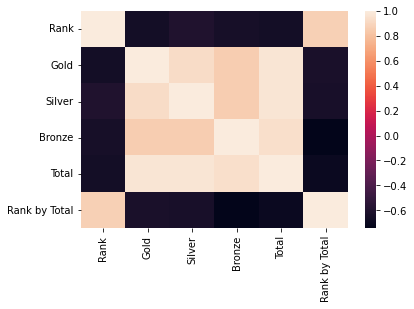

In [80]:
# heatmap

sns.heatmap(medal_count.corr())

In [92]:
# contingency table
crosstab =  medal_count[['Silver','Gold']].pivot_table(index='Silver', columns='Gold', aggfunc=lambda x: len(x), margins=True)
crosstab.fillna(0)

ValueError: For argument "inplace" expected type bool, received type int.

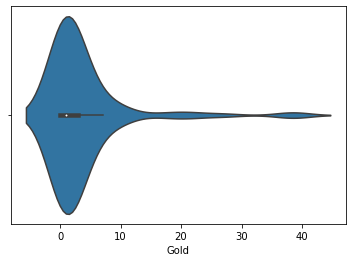

In [96]:
# violin plot

sns.violinplot(x=medal_count["Gold"])

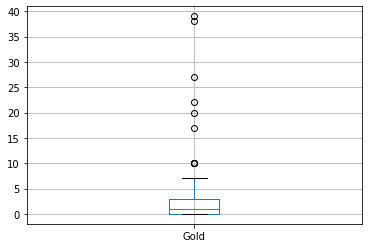

In [95]:
medal_count.boxplot(column="Gold")
